# Introduction to  neural network classification with TensorFlow

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
* Binary Classification
* Multi Class Classfication
* Multi Label Classification


## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


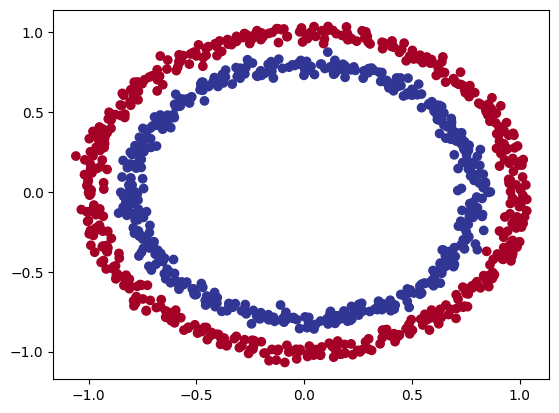

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Inputs an Outputs

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of feature and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

The steps in modelling with tensor flow are:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate...

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Create a model using the sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.2654 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.4560
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4830
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4660


In [ ]:
# Lets try and improve our model by training for longer

model_1.fit(X,y, epochs=200)
model_1.evaluate(X,y)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4660
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4660
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5080
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4790
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/

[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy. It is performing as if it is guessing. Let's add an extra layer

In [ ]:
# add another layer and train for longer
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# fit the model for 200 epochs
model_2.fit(X, y, epochs=200)

#evaluate the model
model_2.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 3s 8ms/step - loss: 1.0686 - accuracy: 0.4690
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.4870
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.4840
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6996 - accuracy: 0.4960
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 0.6985 - accuracy: 0.4970
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6973 - accuracy: 0.5060
Epoch 8/200
32/32 [==============================] - 0s 12ms/step - loss: 0.6968 - accuracy: 0.4970
Epoch 9/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6963 - accuracy: 0.4900
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.4990
Epoch 1

[0.6935283541679382, 0.5]

## Improve our model

Let's improve our model by:

1. Create a model(Add more layers or increase the number of hidden units)
2. Compiling the model( Choose a differrent optimization function)
3. Fitting the model(Fit our model for more epochs)

In [ ]:
# create a model with more hidden units and an extra layer
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #added 100 neurons
    tf.keras.layers.Dense(10), # added new layer with 10 neurons
    tf.keras.layers.Dense(1)
])

#compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5040


[0.7018146514892578, 0.5040000081062317]

To visualize our models predictions , let's create a function `plot_decison_boundary()`, this function will
* Take in trainied model features and labels
* Create a meshgrid of the differrent X values
* Make predictions across mesh grid
* PLot the predictions as well as line between the differrent zones(where each unique class falls)

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
  '''
  PLot the decison boundary created by a model predicting on X
  '''
  # Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100), np.linspace(y_min, y_max,100))
  # create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack two 2-D arrays on top of each other

  # Make predctions
  y_pred = model.predict(x_in)

  #check for multiclass
  if len(y_pred[0]) >1:
    print("Doing multi class classification")
    # we have to reshape our predictions to get them ready to plot
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred= np.round(y_pred).reshape(xx.shape)

  #plotting the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max());

313/313 [==============================] - 1s 1ms/step
Doing binary classification


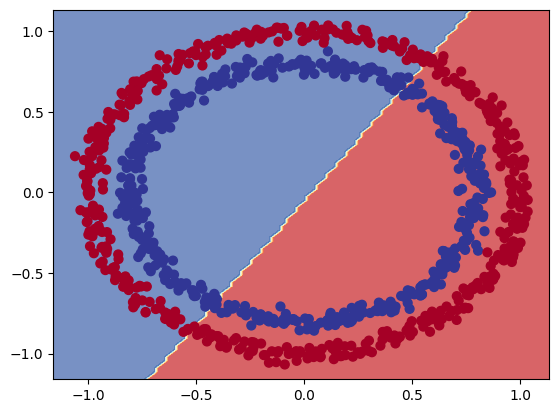

In [ ]:
# check out the predictions we are making
plot_decision_boundary(model_3, X,y)

🛠️ Extra Resource https://cs231n.github.io/neural-networks-case-study/

https://github.com/GokuMohandas/Made-With-ML

https://madewithml.com/#course

In [ ]:
#Let's see if our model can be used for regression model

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#splitting our data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1), tf.expand_dims(y_reg_train,axis=-1), epochs=100)

We are working on a regression problem, but the model we built is for a classification problem. Let's change our model to suit our data.

In [ ]:
#set seed
tf.random.set_seed(42)

# create a model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model with a regression specific loss function

model_4.compile(loss = tf.keras.losses.mse, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

#fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1),tf.expand_dims(y_reg_train,axis=-1), epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 147997.0469 - mae: 353.0794
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 61565.0938 - mae: 233.8618
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 17606.4102 - mae: 127.4469
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 3032.5381 - mae: 47.3087
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 5822.8745 - mae: 64.5706
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 9371.7998 - mae: 80.9090
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 7087.9448 - mae: 70.9183
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 3798.1597 - mae: 51.8557
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 2603.7798 - mae: 42.9123
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 2938.8596 - mae: 45.0047
Epoch 11/100
5/5 [==============

2/2 [==============================] - 0s 7ms/step


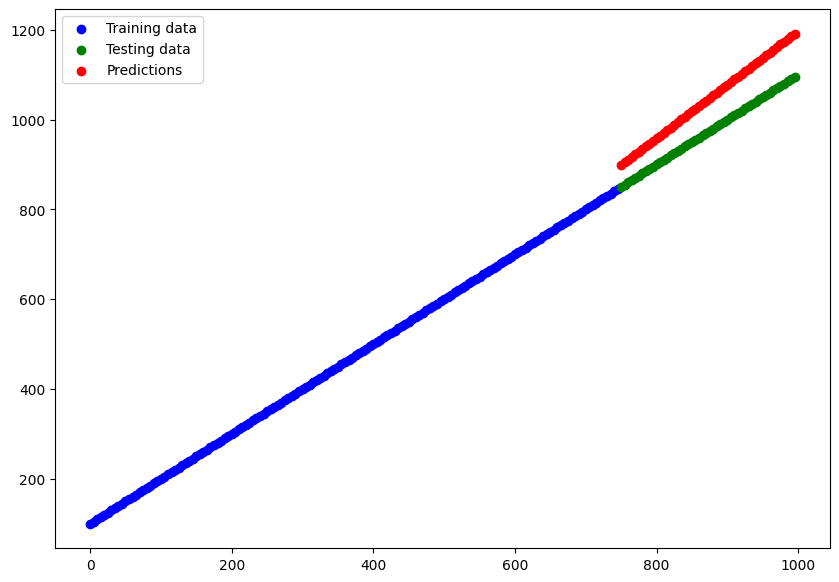

In [ ]:
# Make predictions with our trainied model
y_reg_preds = model_4.predict(tf.expand_dims(X_reg_test, axis=-1))

# plot the models predictions with our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Testing data")
plt.scatter(X_reg_test, tf.squeeze(y_reg_preds), c='r', label="Predictions")
plt.legend();

## The missing piece: Non linearity

In [ ]:
 # Set the random seed
 tf.random.set_seed(42)

 #create model
 model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
 ])
 #compile the model
 model_5.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

 #fit the model
 history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3727 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3506 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3220 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2823 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2299 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1771 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1534 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1277 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0725 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0431 - accuracy: 0.4750
Epoch 11/

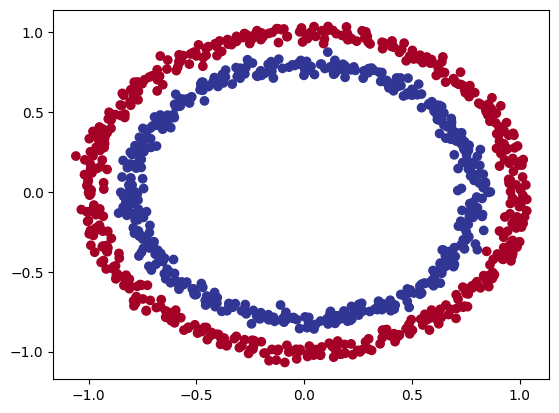

In [ ]:
# Checkout our data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


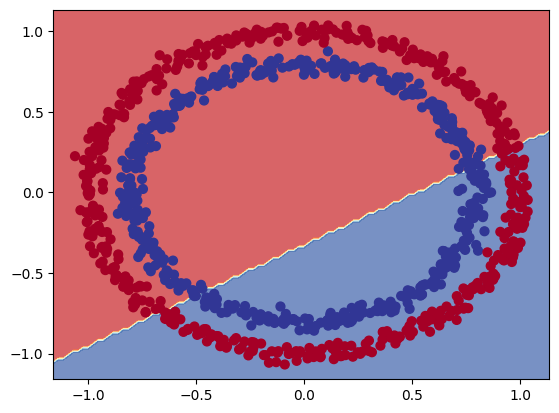

In [ ]:
# Check the decison boundary of our latest model
plot_decision_boundary(model=model_5, X=X,y=y)

Let's try to build a model with non linear activation function.

In [ ]:
#set random seed
tf.random.set_seed(42)

#create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#compiling the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

#fitting the model
history = model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.5627 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4538 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4496 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4421 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4368 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4314 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4263 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4059 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3941 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3885 - accuracy: 0.4750
Epoch 11/

In [ ]:
X.shape

(1000, 2)

In [ ]:
# Time to replicate the multi-layer neural network from tensorflow playground

#set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(None,X.shape[0],X.shape[1]), activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compiling the model
model_7.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# fit the model
history = model_7.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.0367 - accuracy: 0.4870
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.4510
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.4660
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.4180
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8022 - accuracy: 0.3490
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7894 - accuracy: 0.3340
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7797 - accuracy: 0.3250
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.3320
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7666 - accuracy: 0.3380
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.3360
Epoch 11/

In [ ]:
#evaluating the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9690


[0.09350937604904175, 0.968999981880188]

313/313 [==============================] - 1s 3ms/step
Doing binary classification


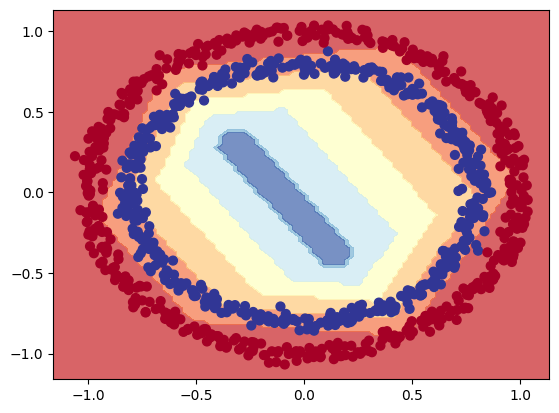

In [ ]:
# How do our model predition look?
plot_decision_boundary(model_7,X,y)

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", input_shape=(None,X.shape[0],X.shape[1])),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#compile the model
model_8.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

#fit the model
history = model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 10ms/step - loss: 0.6978 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5090
Epoch 11

In [ ]:
#evaluate the model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7650


[0.5752357244491577, 0.7649999856948853]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


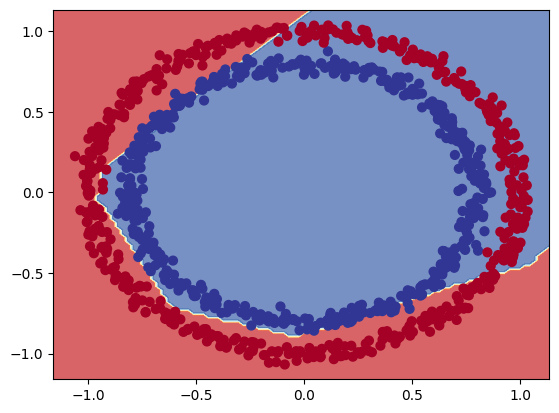

In [ ]:
#let's visualize the improved model
plot_decision_boundary(model_8,X,y)

**Question** What is wrong with the predictions we made? Are we really evaluating our model correctly. What data did the model learn. And what data did we predict on?

**Note:** The combination of linear (straight lines) and non-linear(non-straight lines) functions is one of the key fundamentals of neural network.

Now we have discussed the concept of linear and non linear let's see an example

In [ ]:
# Create a toy tensor (similar to the data we pass on our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

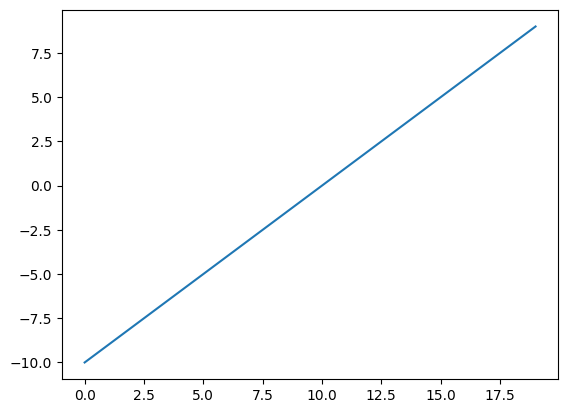

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# use the simoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

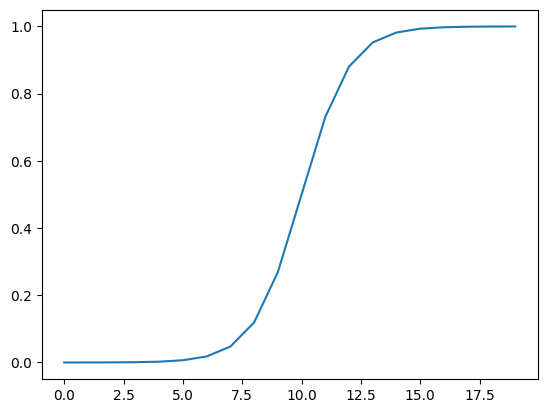

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate relu function
def relu(X):
  return tf.maximum(0,X)

# Pass our toy tensor to the custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

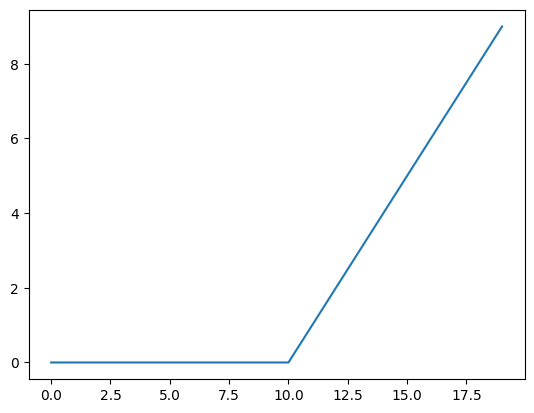

In [ ]:
# Plot ReLu -modified tensor
plt.plot(relu(A))

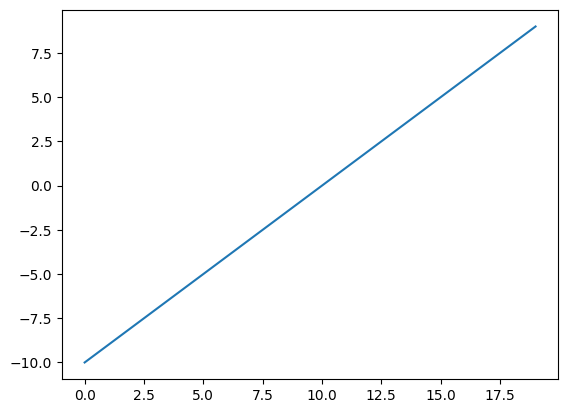

In [ ]:
plt.plot(A)

In [ ]:
# Let's try our linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

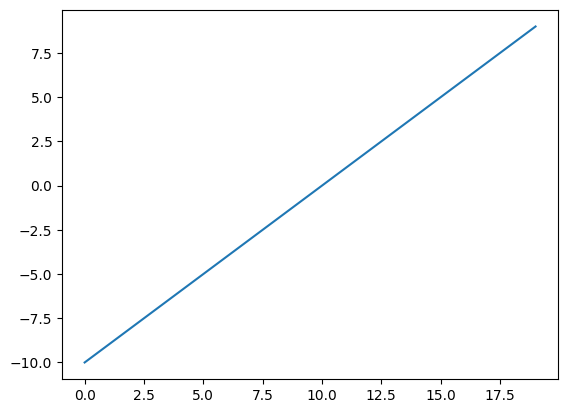

In [ ]:
# Does the activation function does anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**NOTE:** For cheat sheet on activation functions visit: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving the classification model

So far we have been training and tesgin on the same dataset. So let's create a train and test set


In [ ]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Lets create a model to fit on the training data and evaluate on the test data
#set seed
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu",
                          input_shape=(None,X_train.shape[0], X_train.shape[1])
                          ),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

#compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#fitting the model
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6845 - accuracy: 0.5375
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5663
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5650
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6350
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6600
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6338
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7425
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7650
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7688
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8525
Epoch 11/25
25/25 [

In [ ]:
# Evaluating the model on test data set
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9950


[0.06493807584047318, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


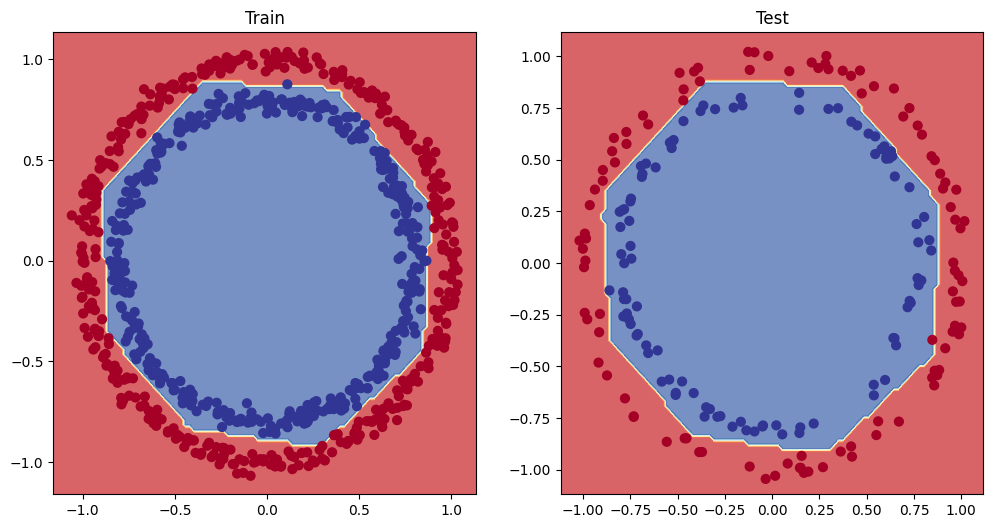

In [ ]:
# plot the decision boundary for the training and test data set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y= y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# convert the history object to dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684487,0.53750
1,0.674477,0.56625
2,0.667044,0.56500
3,0.656350,0.63500
4,0.645091,0.66000
5,0.627870,0.63375
6,0.606156,0.74250
7,0.586693,0.76500
8,0.549416,0.76875
9,0.503402,0.85250


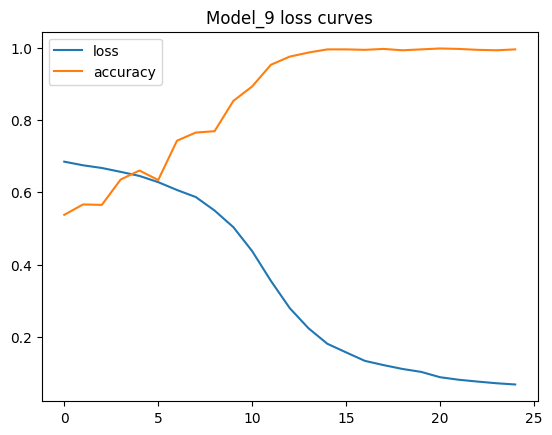

In [ ]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves");

**Note:** For many problems the loss function going down means the model is improving(the predictions it's making are getting closer to ground truth labels)


## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality to your model while it is training.
* Another model (we could use the same one as above, but we are practicing building models here).
* A modified loss curve plot

In [ ]:
# set random seed
tf.random.set_seed(42)

#create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", input_shape=(None,X_train.shape[0],X_train.shape[1])),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# create our learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch:1e-4 * 10**(epoch/20)
)

#fit the model(passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7092 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4925 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

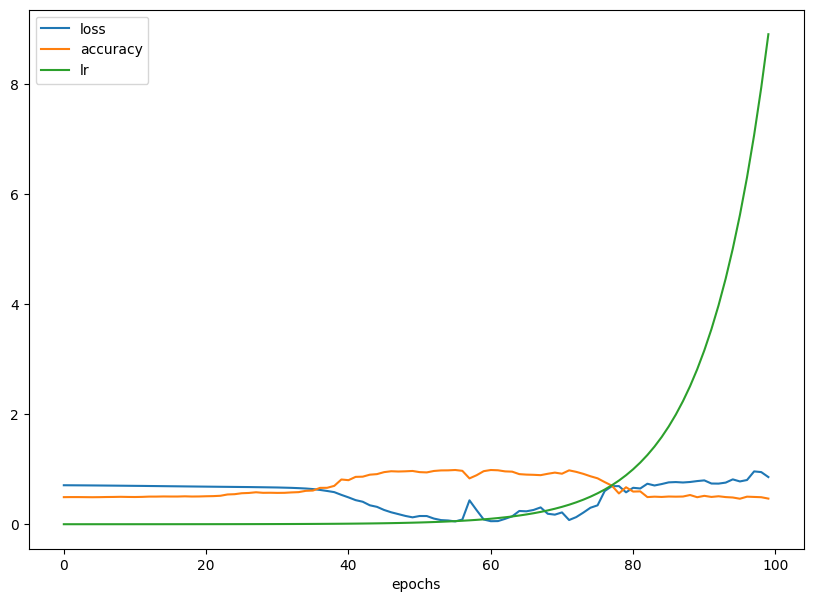

In [ ]:
# checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs");

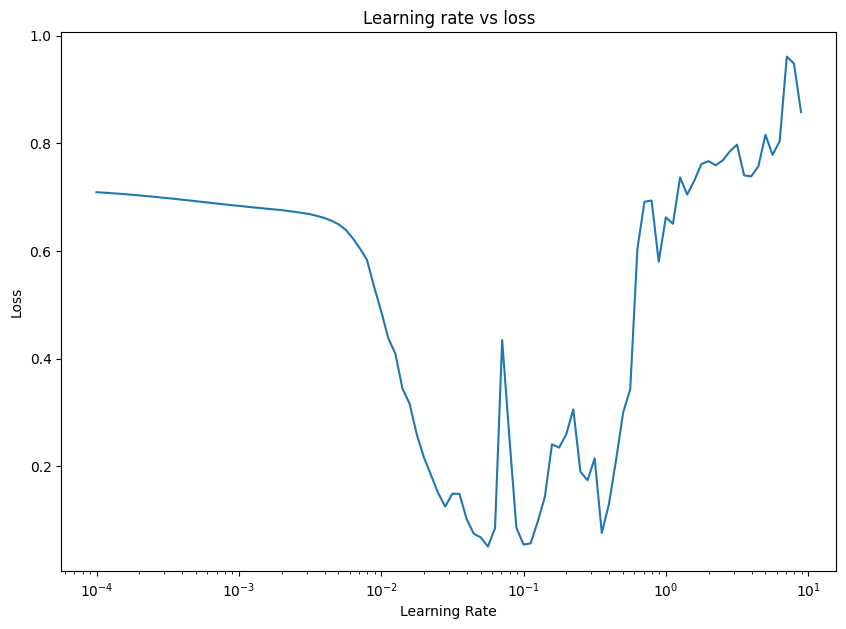

In [ ]:
# plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss");

In [ ]:
# Example of other typical learning rates are
10**0, 10**-1, 10**-2, 10**-3, 1e-4


(1, 0.1, 0.01, 0.001, 0.0001)

**Note:** ideal learning rate is 10 times smaller than the lowest point in the above curve. This measure is taken always. To find the ideal learning rate plot the learning rate vs loss and go to the point where the loss is minimum. Then go back to the point where it is sharplt decreasing.

In [ ]:
10**-2

0.01

In [ ]:
# Let's try using a higher ideal learning rate with the same model as before

#set random seed
tf.random.set_seed(42)

#create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", input_shape=(None, X_train.shape[0], X_train.shape[1])),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compiling the model with the ideal learning rate
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                 metrics=["accuracy"])

#fitting the model
history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6825 - accuracy: 0.5375
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6400
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7113
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7613
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8175
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8662
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8800
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9200
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9325
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9663
Epoch 11/20
25/25 [

In [ ]:
# evaluating the model
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000


[0.017213648185133934, 1.0]

In [ ]:
# evaluate model 9 on the test data
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9950


[0.06493807584047318, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


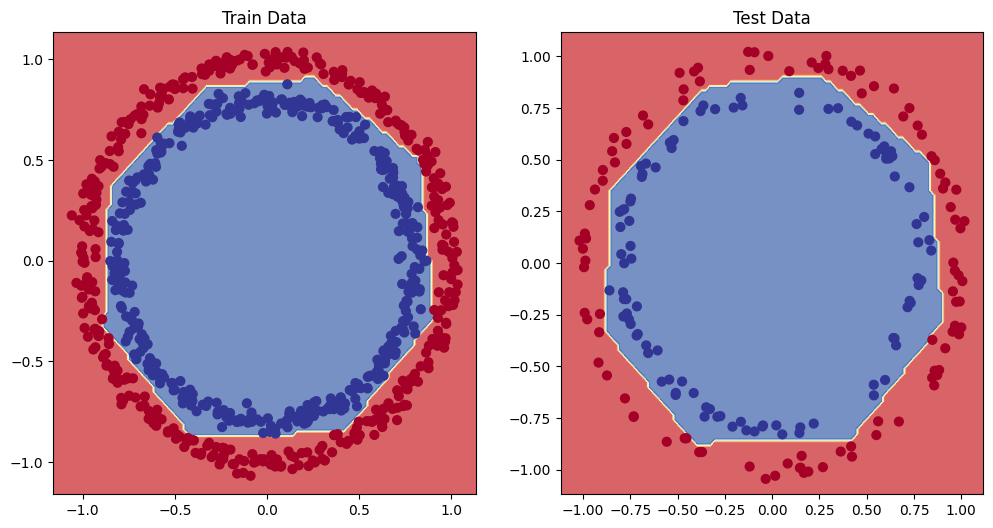

In [ ]:
# plot the decision boundary for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show()

## More Classification Evaluation methods

Alongside visualizing our model's results as much as possible. There are a handful of other classification evaluation methods and metrics you should be familiar with.

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion matrix
* Classification report(Sci-kit learn)

**NOTE:** High precision leads to less false positives.High recall leads to less false negatives.If you want to improve the precision the recall goes down. and vice versa. This is called precision recall tradeoff. Precision and recall are good metrics if you have class imbalances in your dataset. F1 score is a combination of precision and recall. It is an overall good metric for your model.

In [ ]:
# check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test : {loss}")
print(f"Model accuracy on test set : {(accuracy * 100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Model loss on the test : 0.017213648185133934
Model accuracy on test set : 100.00%


How about a confusion matrix?

In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_11.predict(X_test)

#create a confusion metrics
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
y_preds

array([[9.90369260e-01],
       [9.90369260e-01],
       [9.90369260e-01],
       [9.90369260e-01],
       [6.16678223e-03],
       [2.31770813e-04],
       [9.87194598e-01],
       [4.07962289e-05],
       [9.88831520e-01],
       [3.55159678e-02],
       [9.90230799e-01],
       [1.82989649e-02],
       [9.90369260e-01],
       [9.01130915e-01],
       [9.90369260e-01],
       [9.90369260e-01],
       [9.86496747e-01],
       [9.84184802e-01],
       [3.31374322e-04],
       [9.90369260e-01],
       [1.39699216e-04],
       [9.89440262e-01],
       [9.90369260e-01],
       [9.90369260e-01],
       [7.31156433e-06],
       [9.90369260e-01],
       [9.79899347e-01],
       [2.68232863e-04],
       [7.93571235e-05],
       [9.90369260e-01],
       [2.65634444e-04],
       [9.90369260e-01],
       [9.90369260e-01],
       [1.78052858e-03],
       [5.96470619e-03],
       [9.90369260e-01],
       [9.90369260e-01],
       [9.82817650e-01],
       [9.90369260e-01],
       [9.90369260e-01],


Looks like the prediction array has come out in the **prediction probability** form. The standard output from sigmoid or softmax activation function.

In [ ]:
# convert ourp prediction probabilities in the binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we make the confusion matrix pretty,

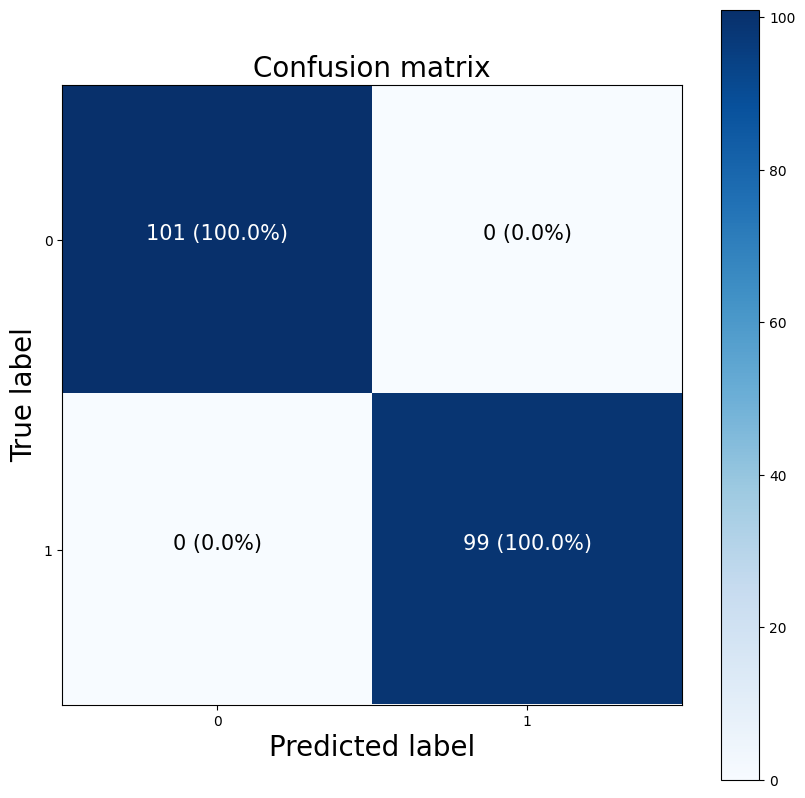

In [ ]:
# Note the confusion matrix code we are about to write is the remix of scikit learns plot_confusion_matrix()

import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None):
  '''
  Takes true labels and predicted labels as input and plot confusion matrix
  y_true:truth labels
  y_pred:predicted labels
  classes: class names of labels default None. If not passed take numbers.
  '''
  figsize=(10,10)

  #create the confusion matrix

  cm = confusion_matrix(y_true, tf.round(y_pred))

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes
  if classes == None:
    classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axis
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjsut label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)", horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)

# calling the function
plot_confusion_matrix(y_test,y_preds)

## Working with a larger example(multiclass classification)

When you have more than 2 classes as an option. It is known as **multiclass-calssification**.

* This means if you have 3 different classes, it is multi class classification.
* It also means if there are 100 classes, it is also multi class classification.

To practice multiclass classification, we are going to build a neural network to classify images of differrent items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted to training and test sets for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training examples
print(f"Training sample : \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

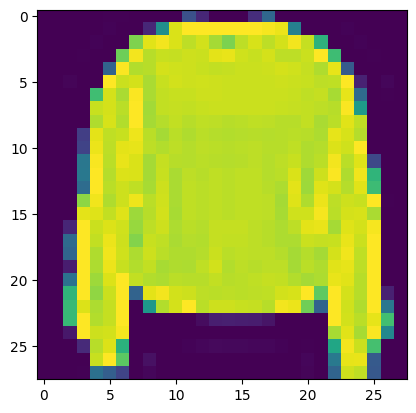

In [ ]:
# plot a saingle sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#check our sample label
train_labels[7]

2

In [ ]:
# create a small list so we can index onto our training labels so they are human readble
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

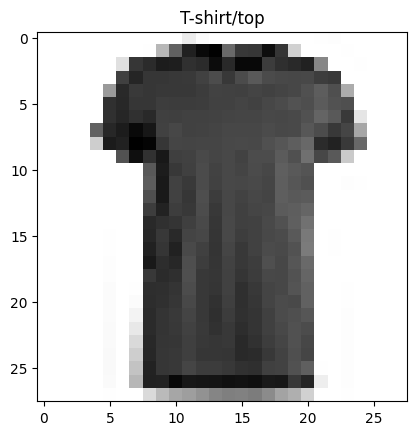

In [ ]:
# plot an example image and it's label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

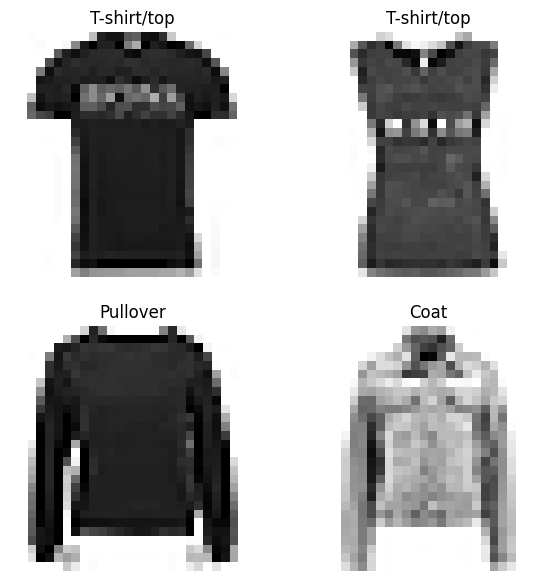

In [ ]:
# plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things:
* input shape = (28 x 28) the shape of one image
* output shape = (10) one per class of clothing.
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax(not sigmoid)

In [ ]:
# flatten the input, does not affect the batch size
# our data needs to be flatten from 28x28 to Nonex784
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])

flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
# here SparseCategoricalCrossentropy() because categorical cross entropy
# need to have the target labels onehot encoded
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

#fit the model
non_norm_history = model_12.fit(train_data, tf.one_hot(train_labels,depth=10),
                                epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4614 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# check the model summary
model_12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# check the min and max of the train data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized), this means they like to have numbers in the tensors they try to find patterns in between 0 & 1.

In [ ]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# trying with the normalized data

#set random seed
tf.random.set_seed(42)

# create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compiling the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model
norm_history = model_13.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1262 - accuracy: 0.5642 - val_loss: 0.8047 - val_accuracy: 0.7100
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7025 - accuracy: 0.7509 - val_loss: 0.7072 - val_accuracy: 0.7467
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6277 - accuracy: 0.7784 - val_loss: 0.6463 - val_accuracy: 0.7746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5909 - accuracy: 0.7922 - val_loss: 0.6130 - val_accuracy: 0.7868
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5715 - accuracy: 0.7997 - val_loss: 0.5992 - val_accuracy: 0.7936
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5563 - accuracy: 0.8054 - val_loss: 0.6180 - val_accuracy: 0.7871
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5454 - accuracy: 0.8091 - val_loss: 0.6126 - val_accuracy:

**NOTE:** Neural networks tend to prefer data in numerical form as well as scaled/normalized form(numbers between 0 & 1)

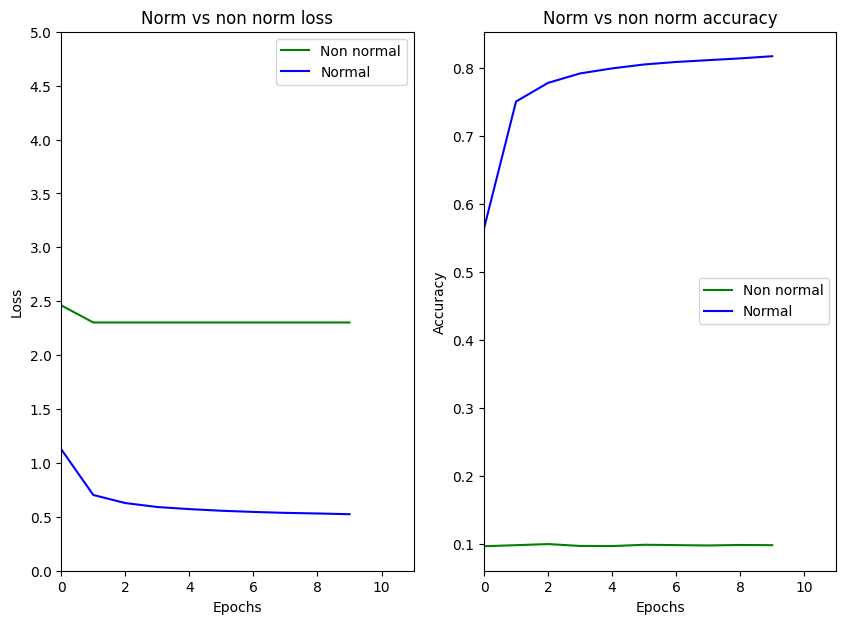

In [ ]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(non_norm_history.history['loss'], label="Non normal", c="g")
ax1.plot(norm_history.history['loss'], label="Normal", c="b")
ax1.set(xlabel="Epochs", ylabel="Loss", title="Norm vs non norm loss")
ax1.set_xlim(0,11)
ax1.set_ylim(0,5)
ax1.set_yticks([i/10 for i in range(0,51,5)])
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(non_norm_history.history['accuracy'], label="Non normal", c="g")
ax2.plot(norm_history.history['accuracy'], label="Normal", c="b")
ax2.set(xlabel="Epochs", ylabel="Accuracy", title="Norm vs non norm accuracy")
ax2.set_xlim(0,11)
ax2.legend()
plt.show()

<Axes: title={'center': 'Normalized Data'}>

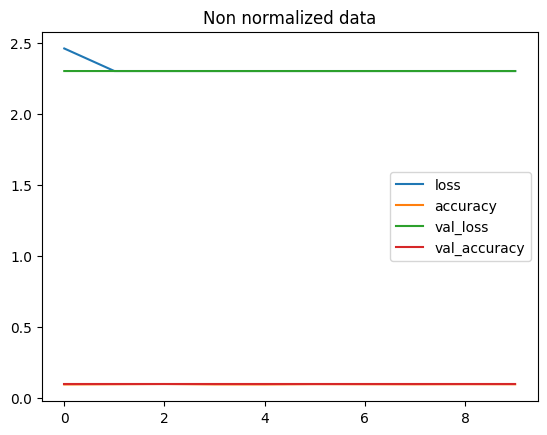

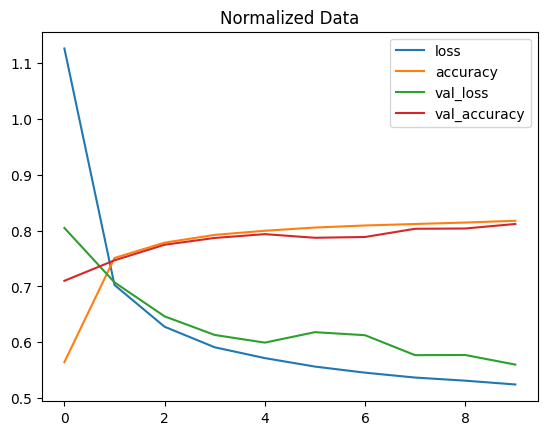

In [ ]:
# alterntively
import pandas as pd

# plot non normalized loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")

#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

> **NOTE:** The same model with even slightly differrent data can produce dramatically differrent results. So when you are compairing models, it is important to make sure that you are compairing them on same criteria.(eg. same architecture but differrent architecture or same data but differrent architecture).

## Finding the ideal learning rate

In [ ]:
# set the random seed
tf.random.set_seed(42)

#create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# fit the model
lr_history = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5816 - accuracy: 0.3592 - val_loss: 1.1898 - val_accuracy: 0.5477 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0759 - accuracy: 0.5686 - val_loss: 1.0178 - val_accuracy: 0.6087 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9394 - accuracy: 0.6398 - val_loss: 0.8481 - val_accuracy: 0.6761 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7978 - accuracy: 0.6862 - val_loss: 0.7882 - val_accuracy: 0.6899 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7554 - accuracy: 0.6938 - val_loss: 0.7515 - val_accuracy: 0.6997 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7185 - accuracy: 0.7059 - val_loss: 0.7243 - val_accuracy: 0.7085 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

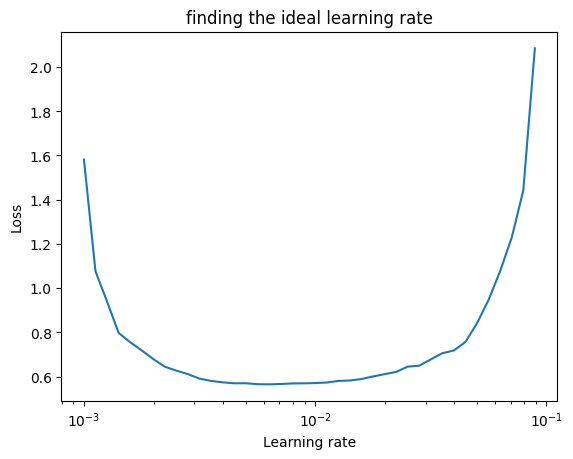

In [ ]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('finding the ideal learning rate');

In [ ]:
10 ** -3

0.001

In [ ]:
# Let's refit the model with the ideal learning rate

#set random seed
tf.random.set_seed(42)

# create model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compiling the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

#fit the model
ideal_lr_history = model_15.fit(train_data_norm, train_labels,
                                validation_data=(test_data_norm, test_labels),
                                epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2410 - accuracy: 0.5005 - val_loss: 0.8403 - val_accuracy: 0.6415
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7615 - accuracy: 0.6988 - val_loss: 0.7452 - val_accuracy: 0.7239
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7024 - accuracy: 0.7358 - val_loss: 0.7042 - val_accuracy: 0.7248
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6694 - accuracy: 0.7537 - val_loss: 0.6786 - val_accuracy: 0.7586
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6468 - accuracy: 0.7630 - val_loss: 0.6602 - val_accuracy: 0.7692
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6299 - accuracy: 0.7705 - val_loss: 0.6698 - val_accuracy: 0.7625
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6178 - accuracy: 0.7744 - val_loss: 0.6666 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its perfomance using other classification metrics(such as confusion matrix)
* Assess some of it's predictions through visualisations
* Improve it's result (by training for longer or changing the architecture)
* Save and export it for using in an application

Let's go through the top 2

In [ ]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred,size, classes=None):
  '''
  Takes true labels and predicted labels as input and plot confusion matrix
  y_true:truth labels
  y_pred:predicted labels
  classes: class names of labels default None. If not passed take numbers.
  '''
  figsize=(size,size)

  #create the confusion matrix

  cm = confusion_matrix(y_true, tf.round(y_pred))

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes
  if classes == None:
    classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axis
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjsut label size
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(15)

  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)", horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make some precitions
y_probs = model_15.predict(test_data_norm)

#view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[9.0384462e-12, 3.9013650e-09, 3.0115221e-17, 2.0261523e-06,
        2.6337493e-10, 3.8575822e-01, 9.8816376e-13, 9.0067267e-02,
        1.6667836e-04, 5.2400583e-01],
       [6.1977684e-05, 4.1265312e-06, 6.4871335e-01, 9.5618394e-05,
        2.4900128e-01, 1.6133936e-19, 1.0212348e-01, 0.0000000e+00,
        9.0448509e-08, 2.7427361e-20],
       [9.1840659e-05, 9.9911392e-01, 3.4077672e-08, 7.1893091e-04,
        5.5605926e-07, 2.0052411e-09, 6.7160545e-05, 3.5139280e-24,
        7.4472450e-06, 1.9245288e-14],
       [4.7070341e-08, 9.9992877e-01, 2.7708033e-12, 4.4679931e-05,
        1.0290245e-08, 6.6210787e-11, 1.5954974e-07, 1.3701514e-27,
        2.6227979e-05, 3.4623380e-16],
       [1.8121076e-01, 8.7060630e-03, 1.7415236e-01, 4.9237967e-02,
        4.0848456e-02, 7.6592812e-09, 5.4580796e-01, 1.8652451e-25,
        3.6339130e-05, 4.4509275e-11]], dtype=float32)

**NOTE:** Remember to make your predictions on the same kind of data that you trained your model on. If you have trained your model on normalized data predict on normalized data only.

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.0384462e-12, 3.9013650e-09, 3.0115221e-17, 2.0261523e-06,
        2.6337493e-10, 3.8575822e-01, 9.8816376e-13, 9.0067267e-02,
        1.6667836e-04, 5.2400583e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#check the first 10 values
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
# evaluating the accuracy
model_15.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7903


[0.5889731645584106, 0.7903000116348267]

In [ ]:
model_13.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.8118


[0.559872031211853, 0.8118000030517578]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_preds)

0.7903

In [ ]:
confusion_matrix(test_labels, y_preds)

array([[755,   2,   6,  60,   6,   4, 151,   0,  16,   0],
       [ 12, 902,   0,  66,   3,   0,  14,   0,   3,   0],
       [ 21,   0, 540,   7, 169,   1, 252,   0,  10,   0],
       [ 39,   5,   4, 815,  41,  10,  75,   0,  10,   1],
       [  1,   0,  78,  30, 752,   0, 113,   0,  26,   0],
       [  0,   0,   0,   3,   0, 897,   0,  55,  11,  34],
       [142,   1, 133,  43, 187,   4, 457,   0,  33,   0],
       [  0,   0,   0,   0,   0,  43,   0, 918,   0,  39],
       [  0,   0,   0,   5,  16,  10,  20,   3, 944,   2],
       [  0,   0,   0,   1,   0,  29,   0,  45,   2, 923]])

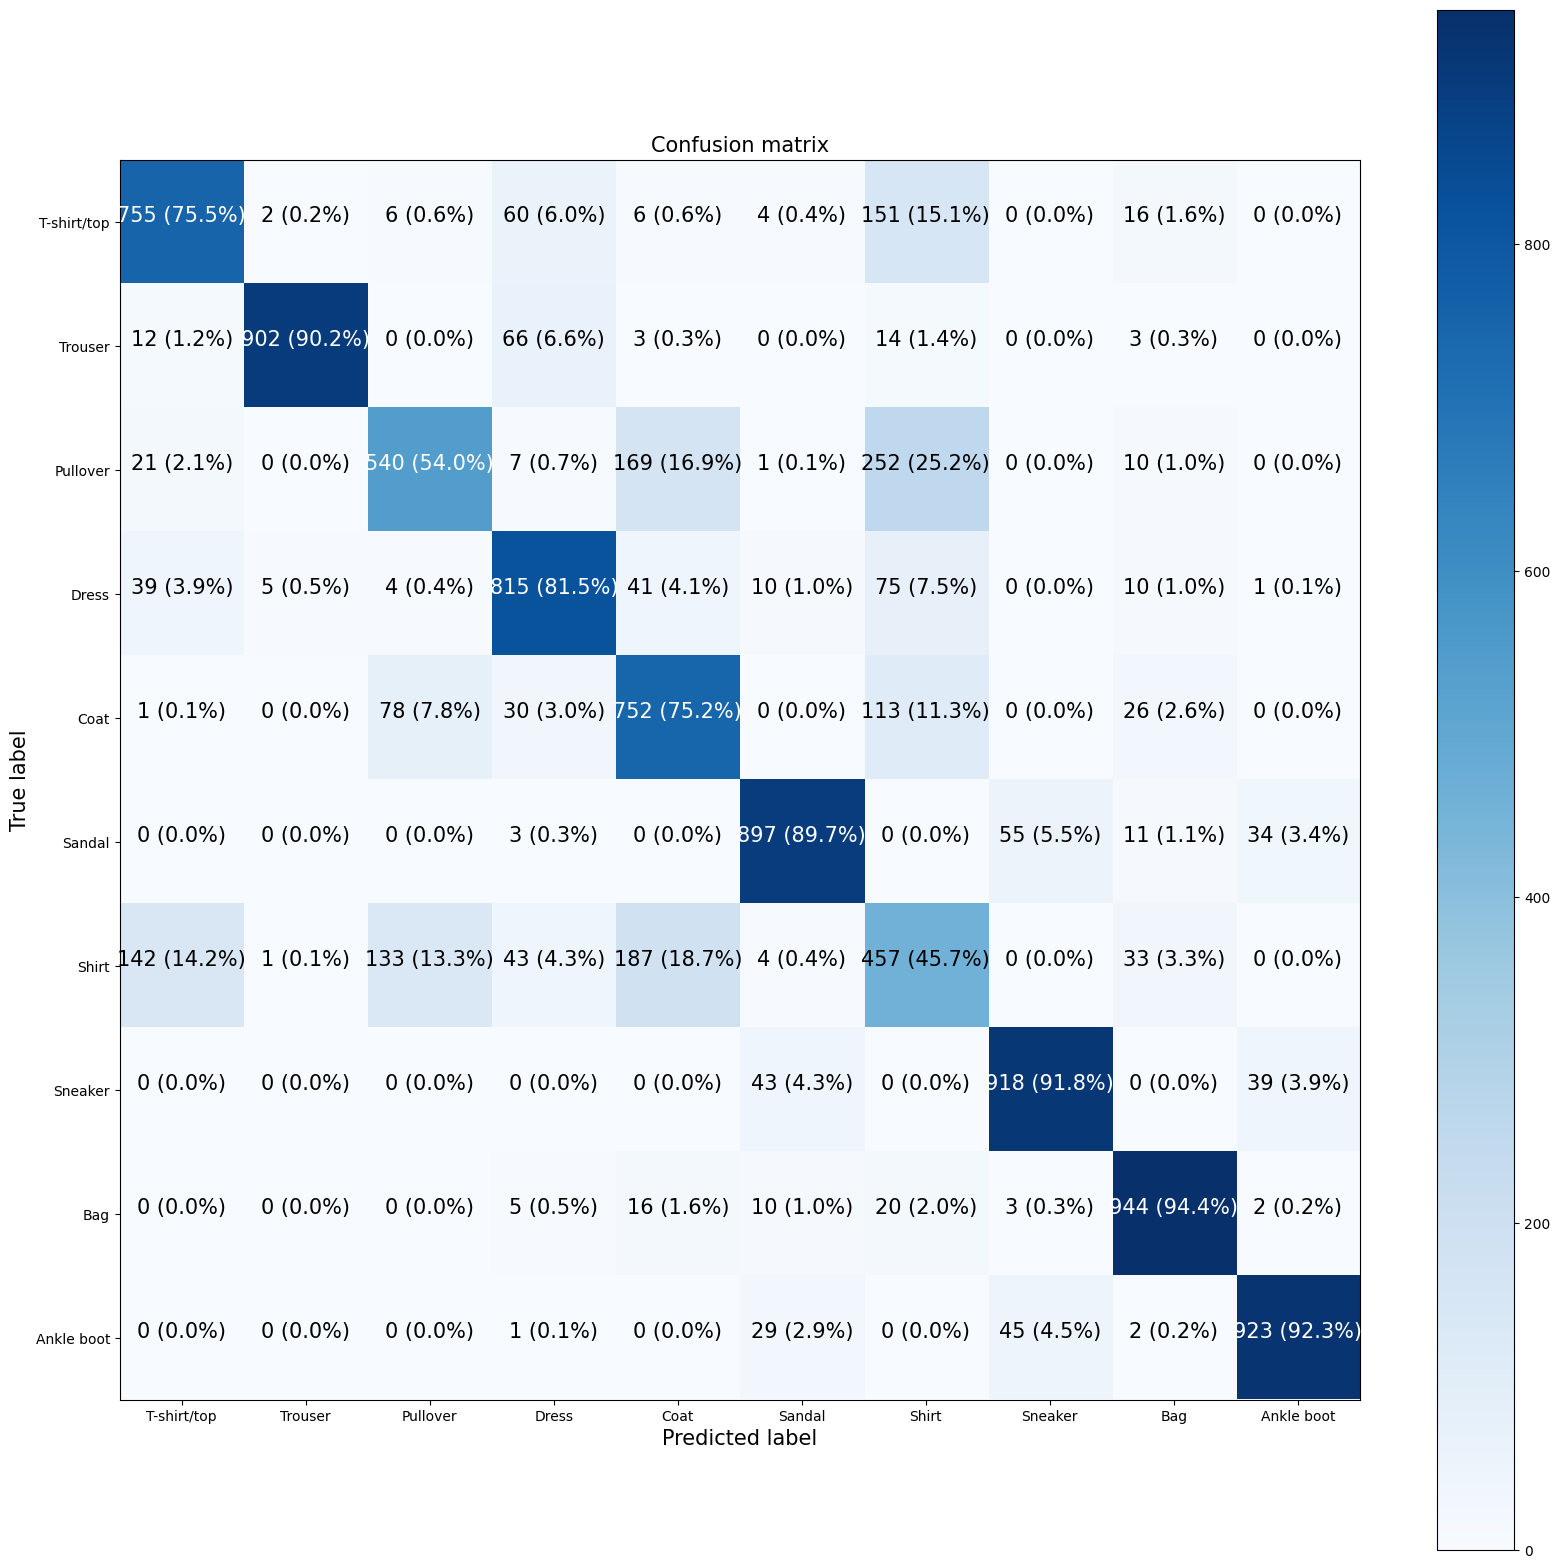

In [ ]:
figsize=20
plot_confusion_matrix(test_labels, y_preds,figsize, class_names)

> **NOTE:** Often when working with images and other forms of visual data, it is a good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of the models.

How about we create a function for:
* Plot a random image
* Make a prediction on the said image
* LAbel the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with prediction and the truth label.
  '''

  #set up random integer
  i = random.randint(0, len(images))

  #create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  #plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #change the color of the title depending upon the accuracy prediction
  if pred_label == true_label:
    color="green"
  else:
    color = "red"

  # Add xlabel information (prediction/truelabel)
  plt.xlabel(f"Pred:{pred_label} {100*tf.reduce_max(pred_probs):.2f}% True label:{true_label}",
             color=color)#set color based on prediction
  return plt



1/1 [==============================] - 0s 40ms/step


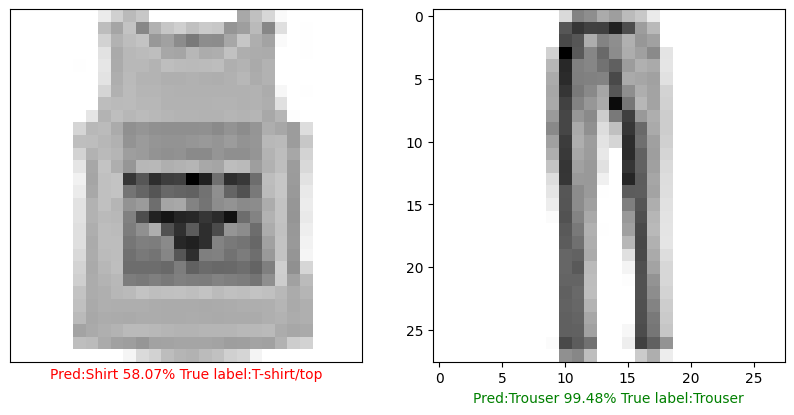

In [ ]:
# check out a random image and it's prediction
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,2,1)
ax1=plot_random_image(model=model_15, images=test_data_norm, true_labels=test_labels, classes=class_names)
ax1.xticks([])
ax1.yticks([])
ax2 = plt.subplot(1,2,2)
ax2 = plot_random_image(model=model_15, images=test_data_norm, true_labels=test_labels, classes=class_names)

In [ ]:
from matplotlib.figure import Figure
def plot_image_prediction_grid(n_images, nrows, ncols, figsize):
  plt.figure(figsize=figsize)
  for i in range(1, n_images+1):
    # plt.figure(figsize=figsize)
    ax = plt.subplot(nrows,ncols,i)
    ax = plot_random_image(model=model_15, images=test_data_norm, true_labels=test_labels, classes=class_names)
    ax.xticks([])
    ax.yticks([])

  plt.tight_layout(pad=0.0)


1/1 [==============================] - 0s 35ms/step


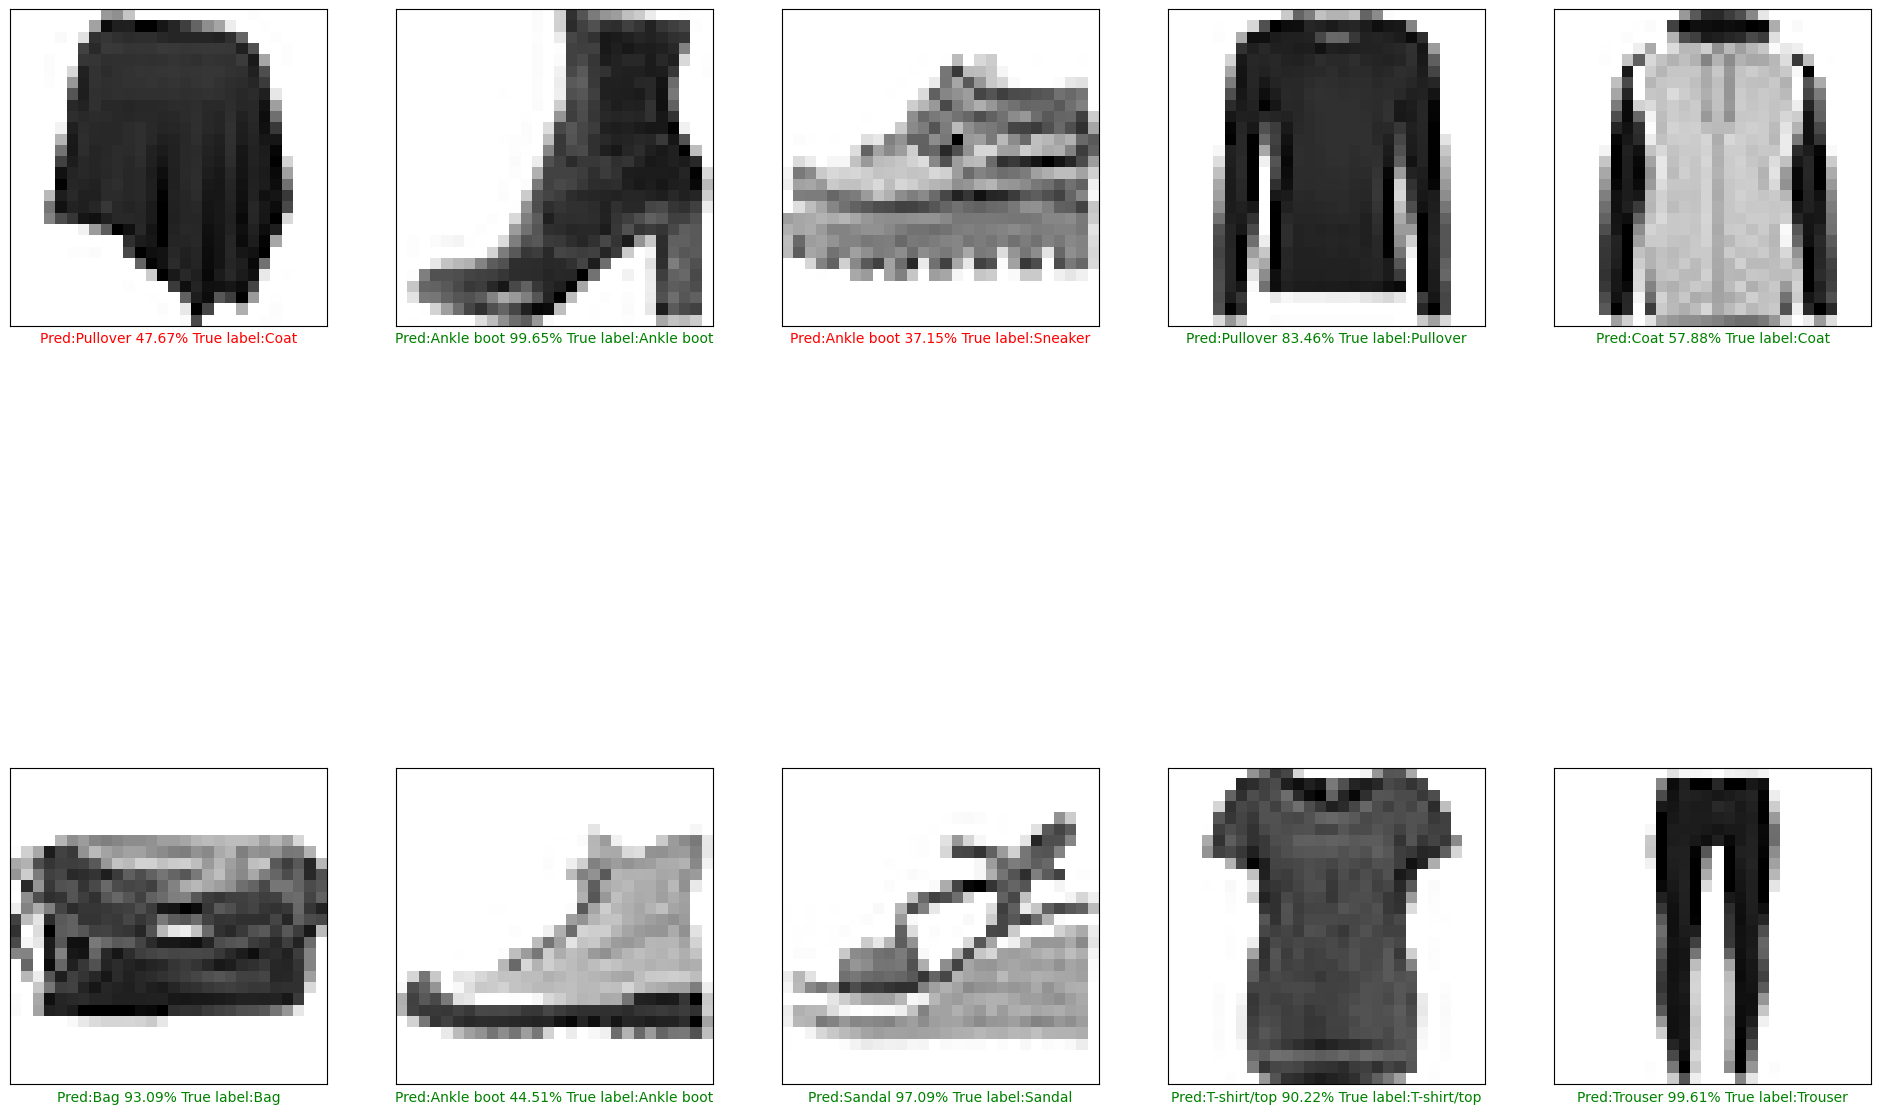

In [ ]:
plot_image_prediction_grid(10,2,5,(20,20))

1/1 [==============================] - 0s 35ms/step


<Figure size 1500x700 with 0 Axes>

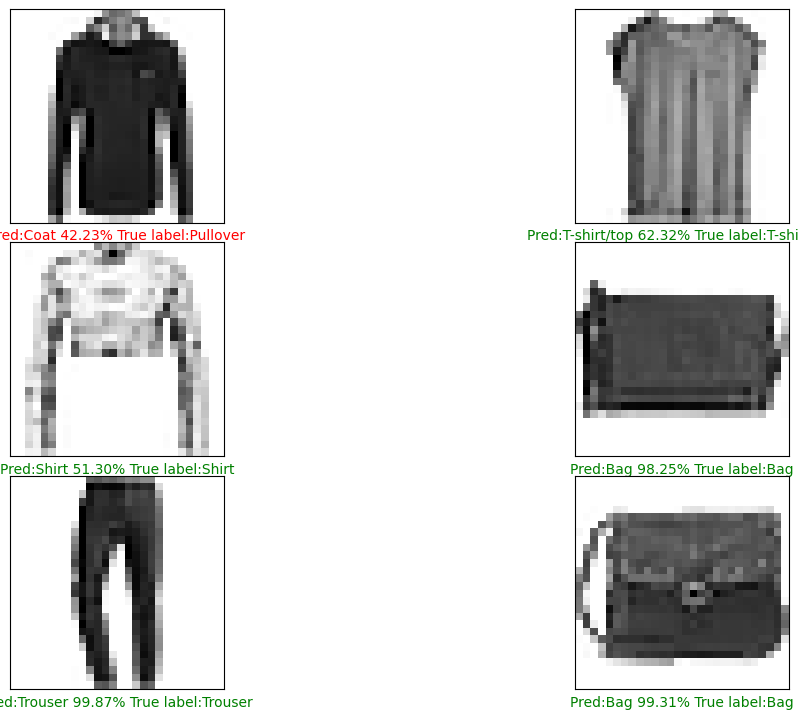

In [ ]:
plt.figure(figsize=(15,7))
plot_image_prediction_grid(6,3,2,(15,7))

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

In [ ]:
# Get the patterns of the layer in our network
weights, biases = model_15.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.67003405, -0.6720281 ,  0.01344646,  0.19106218],
        [ 0.27745765, -0.9101861 ,  0.83518076, -0.14054449],
        [ 0.600812  , -0.73848814,  0.40904886, -1.154743  ],
        ...,
        [ 0.00173701,  0.27922133,  0.1629487 , -0.43409312],
        [-0.06729216,  0.25409508,  0.08067472, -0.41748148],
        [ 0.1328969 ,  0.19795118, -0.5950376 ,  0.20139958]],
       dtype=float32),
 (784, 4))

In [ ]:
28*28

784

In [ ]:
model_15.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's checkout the bias vector

In [ ]:
# Biases and biases shape
biases, biases.shape

(array([ 1.320463  , -0.03565176,  1.9903537 ,  0.17143087], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets intialized as zeros (at least in case of tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_15.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


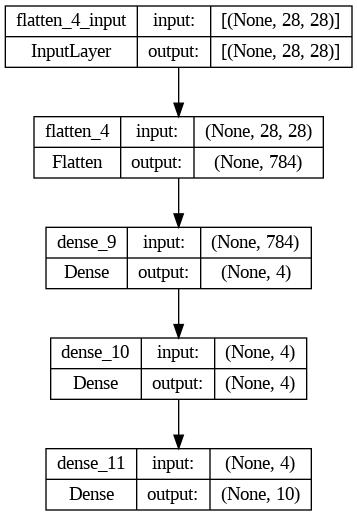

In [ ]:
# Let's checkout another way of viewing our deep learning models
# from tensorflow.keras.utils import plot_model

#see the inputs and outputs of each layer
tf.keras.utils.plot_model(model_15, show_shapes=True)